In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [108]:
raw_model_evaluation_result = pd.read_excel("../result/ML-result-MetaData2所有結果.xlsx", sheet_name = "Model Evaluation").fillna("None")
raw_permutation_importance_result = pd.read_excel("../result/ML-result-MetaData2所有結果.xlsx", sheet_name = "Permutation Importance").fillna("None")
raw_model_evaluation_result

,Data_ID,MetaData_ID,Split_ID,Standardization,Decomposition,FeatureSelection,Model,Features,Set,Number_of_Data,...,Recall_for_0,Macro Recall,Micro Recall,Accuracy,ROC-AUC,fpr,tpr,True_value,Predict_value,Predict_prob_value
0,1,MetaData-2,Split-1,standardization,None,None,Random Forest with Entropy,"['Arterial_mean', 'Arterial_std', 'Arterial_ma...",train,1815,...,1.000000,0.500000,0.679890,0.679890,0.500000,"[0.0, 1.0]","[0.0, 1.0]","[0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.32119220232923607, 0.32119220232923607, 0.3..."
1,1,MetaData-2,Split-1,standardization,None,None,Random Forest with Entropy,"['Arterial_mean', 'Arterial_std', 'Arterial_ma...",vali,606,...,1.000000,0.500000,0.674917,0.674917,0.500000,"[0.0, 1.0]","[0.0, 1.0]","[0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.32119220232923607, 0.32119220232923607, 0.3..."
2,1,MetaData-2,Split-1,standardization,None,None,Random Forest with Entropy,"['Arterial_mean', 'Arterial_std', 'Arterial_ma...",test,606,...,1.000000,0.500000,0.676568,0.676568,0.500000,"[0.0, 1.0]","[0.0, 1.0]","[1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.32119220232923607, 0.32119220232923607, 0.3..."
3,1,MetaData-2,Split-1,standardization,None,None,Random Forest with Gini,"['Arterial_mean', 'Arterial_std', 'Arterial_ma...",train,1815,...,1.000000,0.500000,0.679890,0.679890,0.500000,"[0.0, 1.0]","[0.0, 1.0]","[0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.3211529026630493, 0.3211529026630493, 0.321..."
4,1,MetaData-2,Split-1,standardization,None,None,Random Forest with Gini,"['Arterial_mean', 'Arterial_std', 'Arterial_ma...",vali,606,...,1.000000,0.500000,0.674917,0.674917,0.500000,"[0.0, 1.0]","[0.0, 1.0]","[0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.3211529026630493, 0.3211529026630493, 0.321..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,16,MetaData-2,Split-1,None,None,SFFS,XGBoost,"['Arterial_mean', 'Arterial_max', 'Arterial_mi...",vali,606,...,1.000000,0.991279,0.995050,0.995050,0.999879,"[0.0, 0.0, 0.0, 0.002304147465437788, 0.002304...","[0.0, 0.005813953488372093, 0.9883720930232558...","[0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, ...","[0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, ...","[0.17456495761871338, 0.8870267271995544, 0.11..."
464,16,MetaData-2,Split-1,None,None,SFFS,XGBoost,"['Arterial_mean', 'Arterial_max', 'Arterial_mi...",test,606,...,0.881928,0.744629,0.795380,0.795380,0.841532,"[0.0, 0.0, 0.0, 0.0024096385542168677, 0.00240...","[0.0, 0.005235602094240838, 0.0628272251308900...","[1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, ...","[0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, ...","[0.10565289109945297, 0.14183364808559418, 0.8..."
465,16,MetaData-2,Split-1,None,None,SFFS,LightGBM,"['Arterial_mean', 'Arterial_min', 'Arterial_me...",train,1815,...,0.991694,0.959022,0.969697,0.969697,0.996679,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00083056...","[0.0, 0.0016366612111292963, 0.068739770867430...","[0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, ...","[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, ...","[0.033975939440636746, 0.22453726358941128, 0...."
466,16,MetaData-2,Split-1,None,None,SFFS,LightGBM,"['Arterial_mean', 'Arterial_min', 'Arterial_me...",vali,606,...,0.995392,0.951184,0.970297,0.970297,0.994173,"[0.0, 0.0, 0.0, 0.004608294930875576, 0.004608...","[0.0, 0.005813953488372093, 0.8953488372093024...","[0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, ...","[0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, ...","[0.1977003606241139, 0.9125856726865725, 0.140..."


## 將原始模型評估結果彙整成交叉表格

In [159]:
group_by_list = ["MetaData_ID", "Split_ID", "Standardization", "Decomposition", "FeatureSelection", "Set", "Model"]
raw_model_evaluation_result = raw_model_evaluation_result.drop(columns = [i for i in raw_model_evaluation_result.columns if raw_model_evaluation_result[i].dtype == "O" and i not in group_by_list])

# Group by
mean_totalResult = raw_model_evaluation_result.groupby(by = group_by_list).mean().drop(columns = ["Data_ID"])
std_totalResult = raw_model_evaluation_result.groupby(by = group_by_list).std().drop(columns = ["Data_ID"])

# Define MultiIndex and Column
multiindex = mean_totalResult.index
column = mean_totalResult.columns

# Combine Mean and Standardization
totalResult = pd.DataFrame([["{} ({})".format(round(one_mean, 4), round(one_std, 4)) for one_mean, one_std in zip(one_mean_list, one_std_list) ] for one_mean_list, one_std_list in zip(mean_totalResult.values.tolist(), std_totalResult.values.tolist())],
                           index = multiindex, columns = column)
totalResult.to_excel("../result/ML-result-MetaData2彙整結果.xlsx")

## 結果繪圖

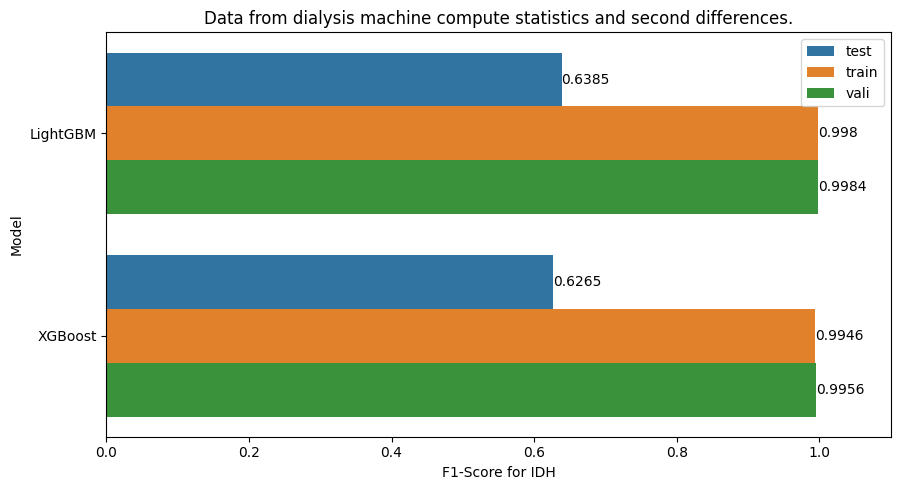

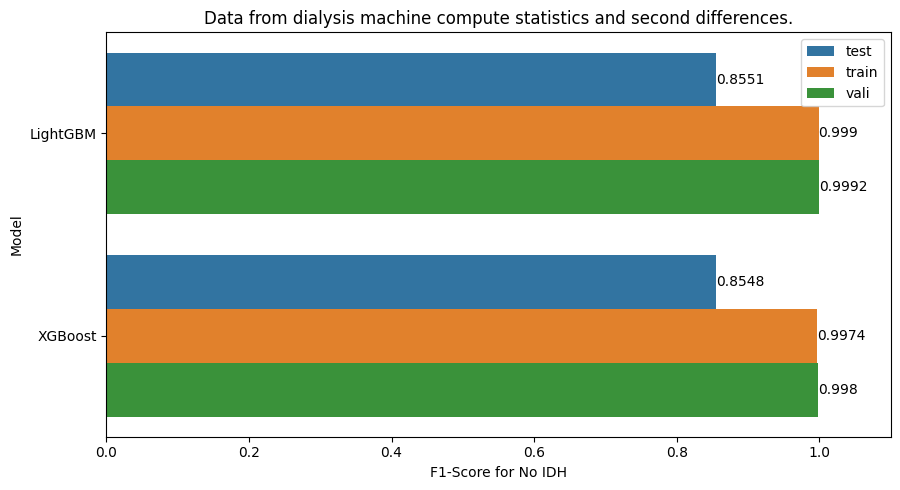

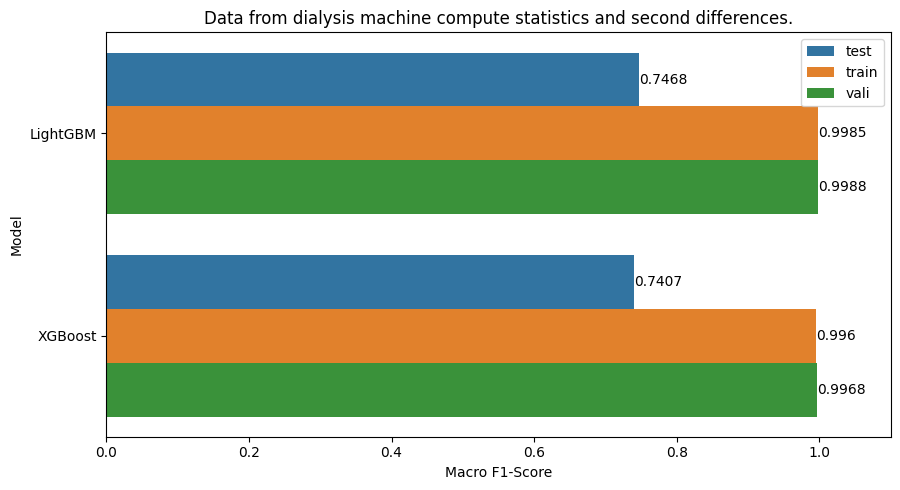

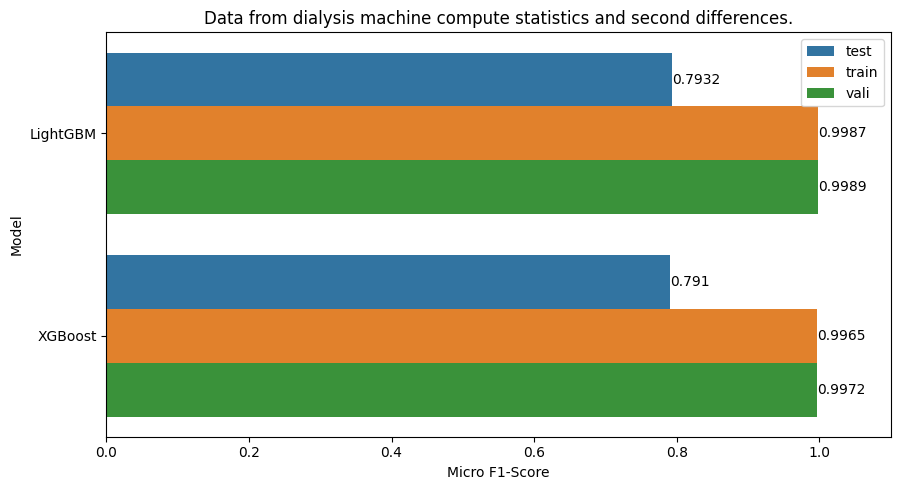

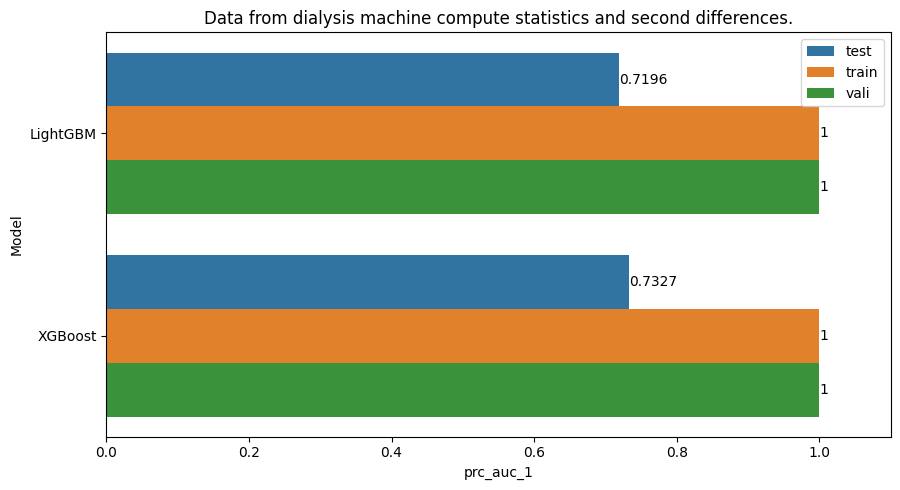

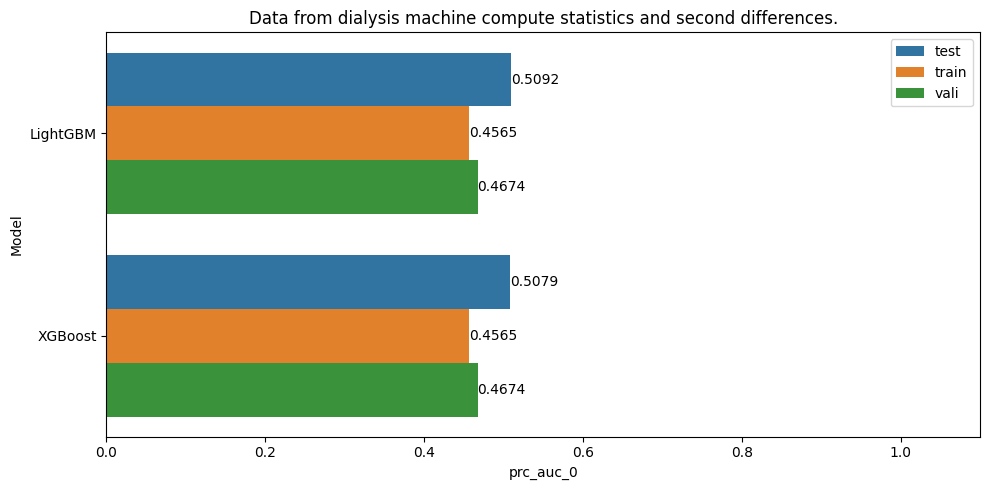

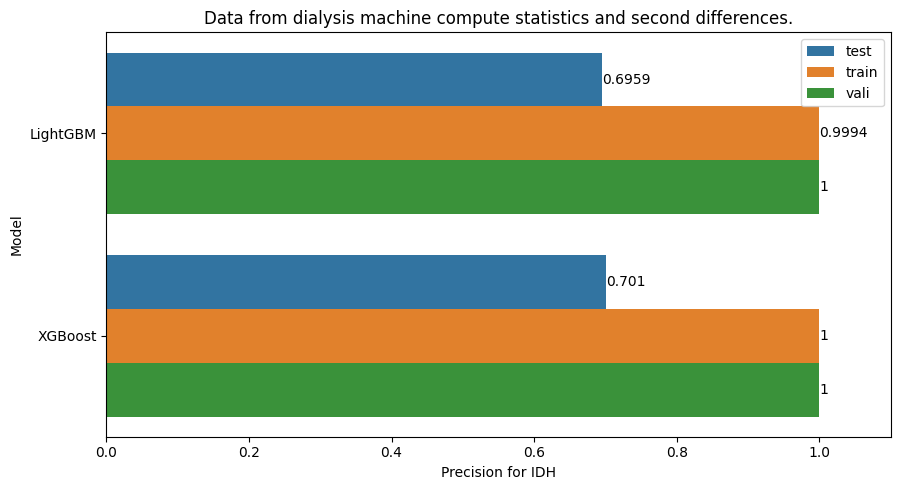

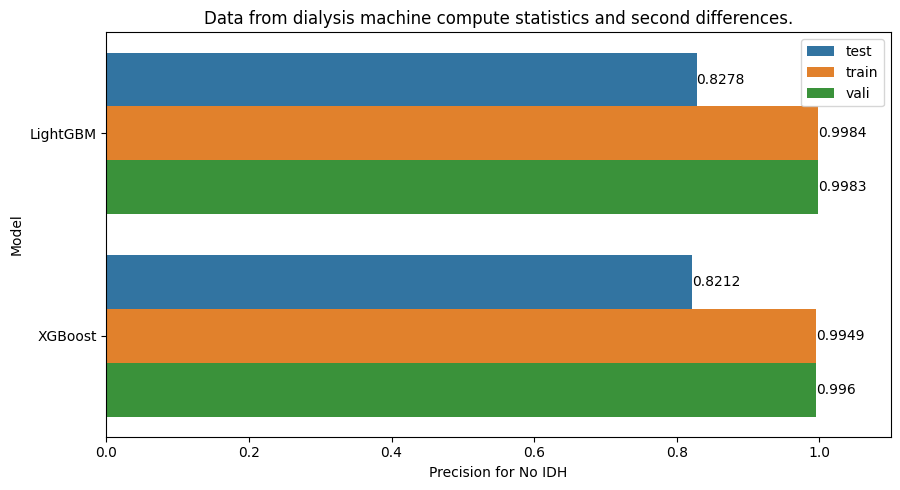

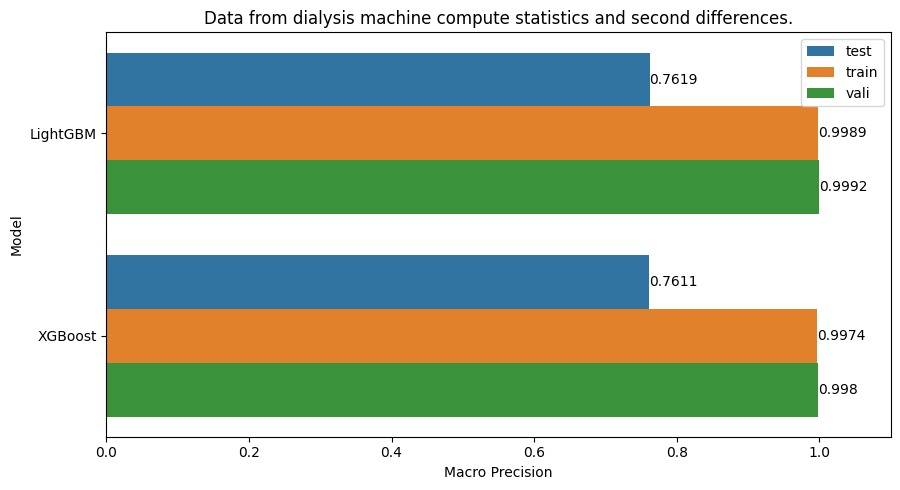

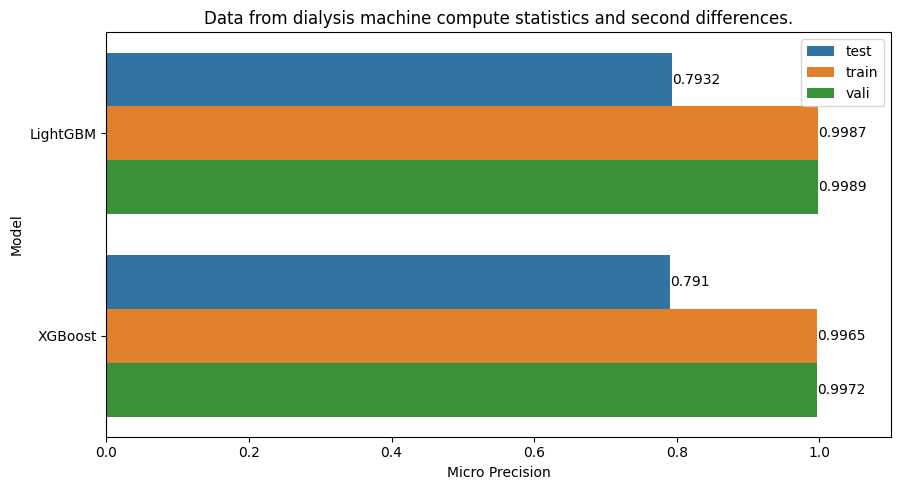

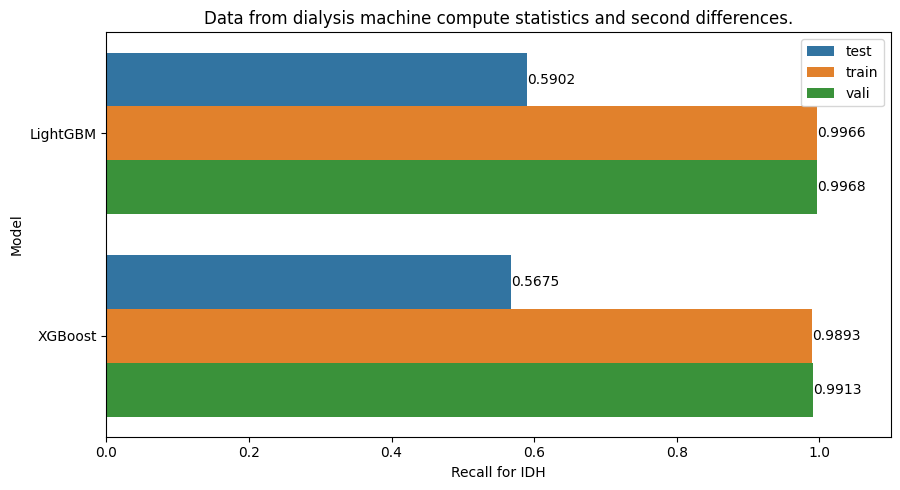

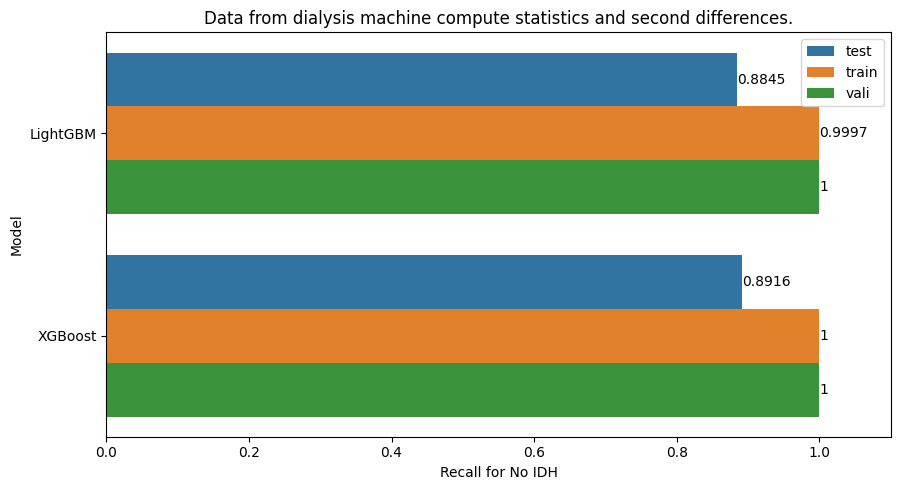

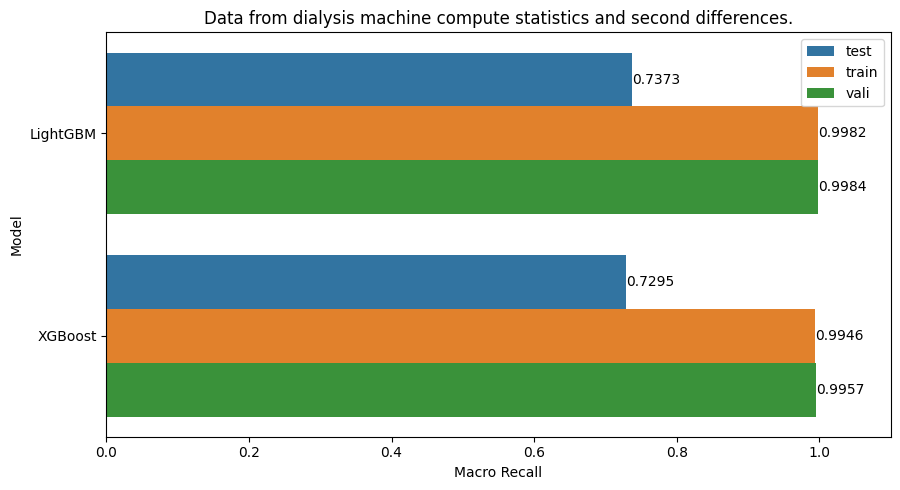

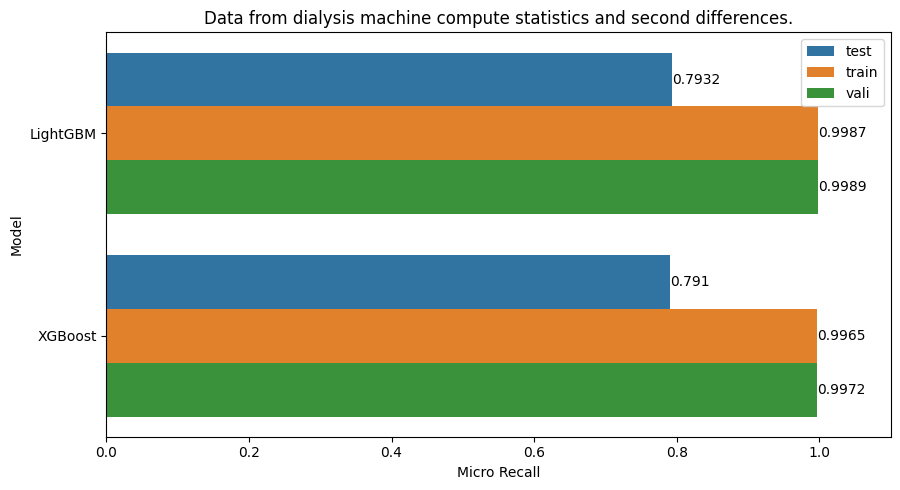

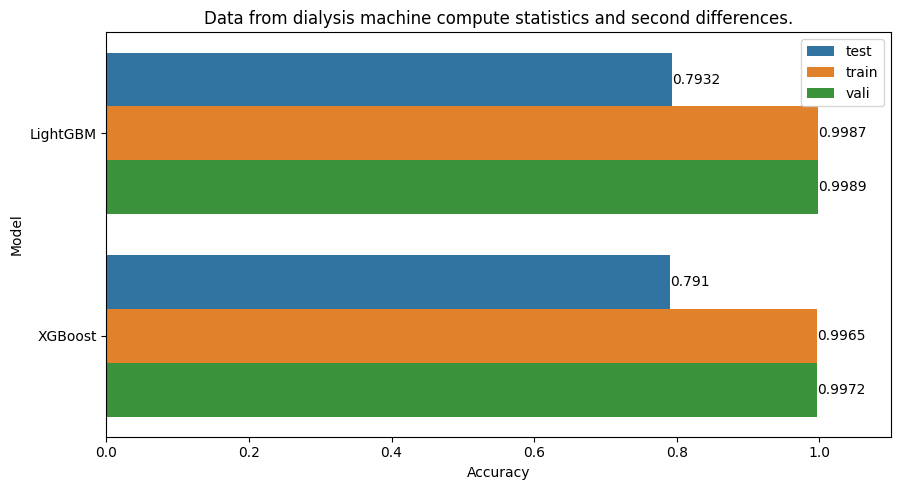

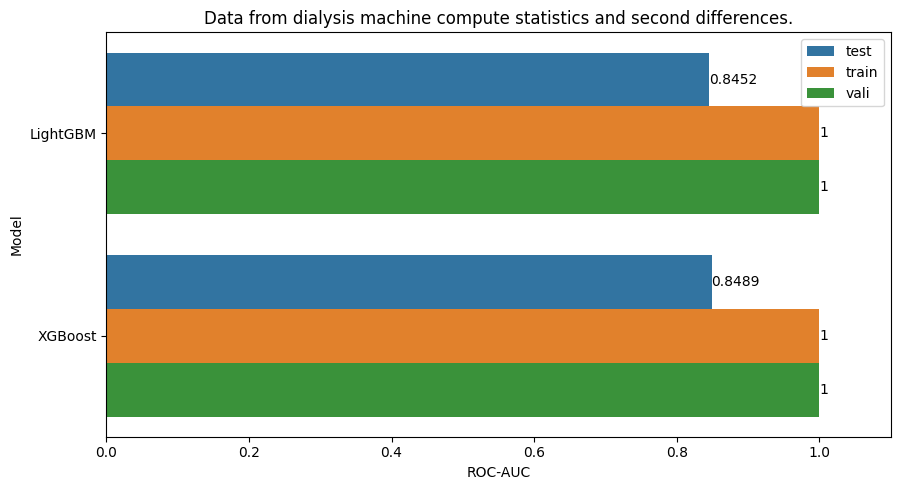

In [160]:
select_mean_totalResult = mean_totalResult.reset_index()
boosting_model = ["LightGBM", "XGBoost", "CatBoost"]
select_mean_totalResult = select_mean_totalResult.query("Standardization == 'None' and FeatureSelection == 'None' and Model in @boosting_model")

for one_column in column[1:]:
    select_mean_totalResult[one_column] = select_mean_totalResult[one_column].apply(lambda x: round(x, 4))
    plt.figure(figsize = (10, 5))
    ax = sns.barplot(data = select_mean_totalResult, y = "Model", x = one_column, hue = "Set")
    for i in ax.containers:
        ax.bar_label(i, )

    if "_for_1" in one_column:
        one_column = one_column.replace("_for_1", " for IDH")
    elif "_for_0" in one_column:
        one_column = one_column.replace("_for_0", " for No IDH")
    plt.xlabel(one_column)
    plt.legend(bbox_to_anchor = (1, 1))
    plt.xlim(0, 1.1)
    plt.title("Data from dialysis machine compute statistics and second differences.")
    plt.tight_layout()
    plt.savefig(f"../result/Result_Plot/MetaData1_Model_Evaluation_{one_column}.png")
    plt.show()

## 彙整 Permutation Importance

In [156]:
group_by_list = ["MetaData_ID", "Split_ID", "Standardization", "Decomposition", "FeatureSelection", "Set", "Model", "Feature"]
raw_permutation_importance_result = raw_permutation_importance_result.drop(columns = [i for i in raw_permutation_importance_result.columns if raw_permutation_importance_result[i].dtype == "O" and i not in group_by_list])

# Group by
mean_totalResult = raw_permutation_importance_result.groupby(by = group_by_list).mean().drop(columns = ["Data_ID"])
std_totalResult = raw_permutation_importance_result.groupby(by = group_by_list).std().drop(columns = ["Data_ID"])

# Define MultiIndex and Column
multiindex = mean_totalResult.index
column = mean_totalResult.columns

# Combine Mean and Standardization
totalResult = pd.DataFrame([["{} ({})".format(round(one_mean, 4), round(one_std, 4)) for one_mean, one_std in zip(one_mean_list, one_std_list) ] for one_mean_list, one_std_list in zip(mean_totalResult.values.tolist(), std_totalResult.values.tolist())],
                           index = multiindex, columns = column)

## 繪製 Permutation Importance 結果

<Figure size 2000x1000 with 0 Axes>

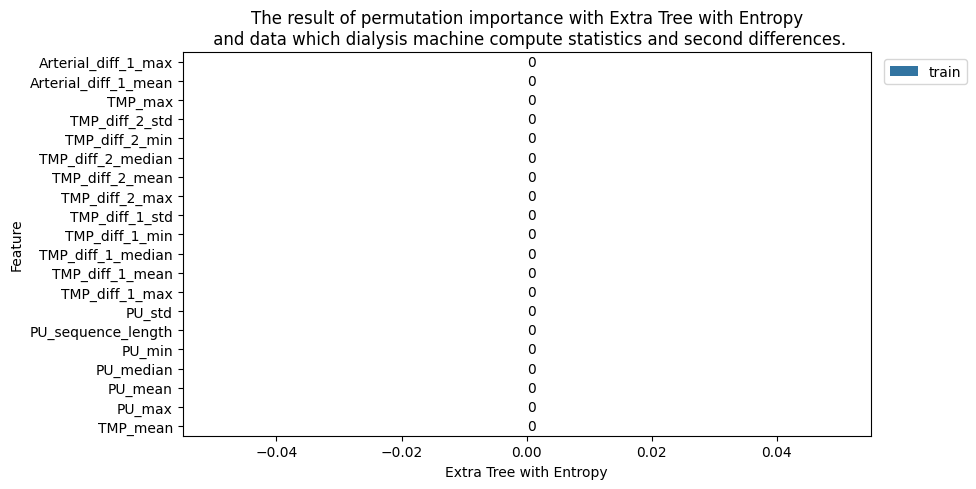

<Figure size 2000x1000 with 0 Axes>

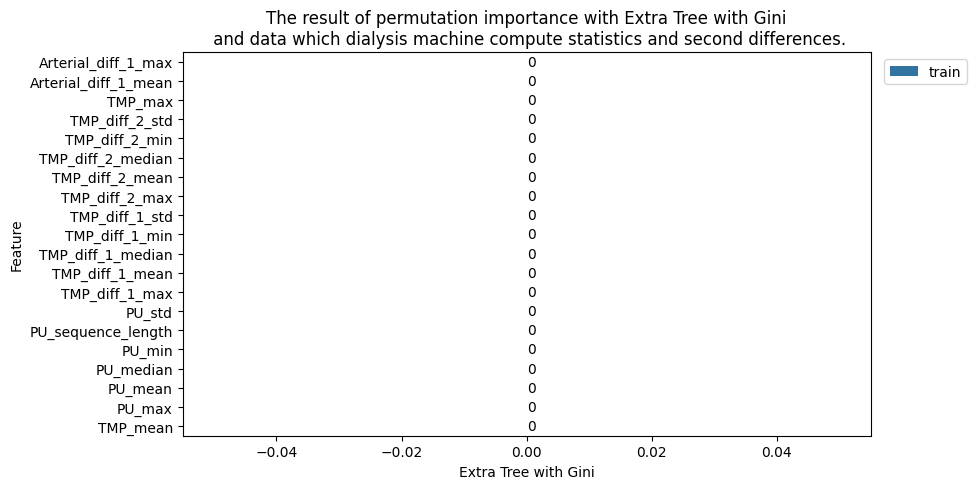

<Figure size 2000x1000 with 0 Axes>

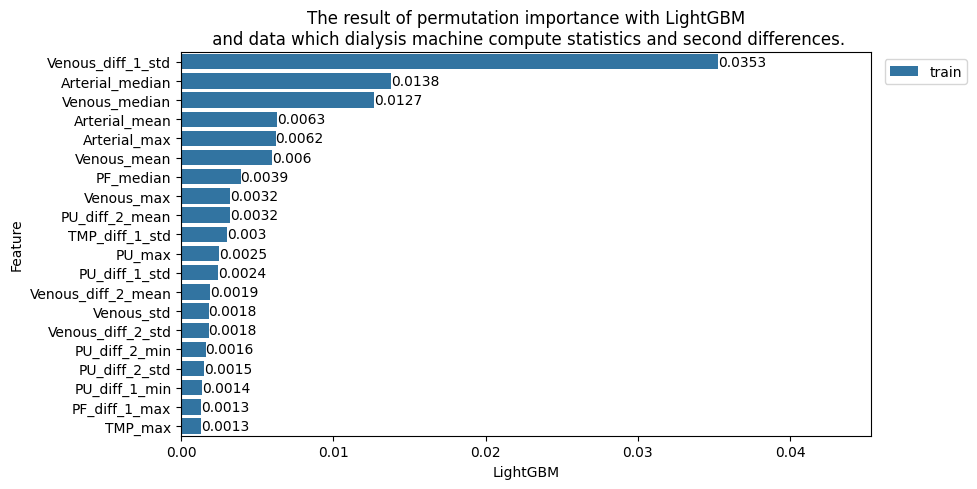

<Figure size 2000x1000 with 0 Axes>

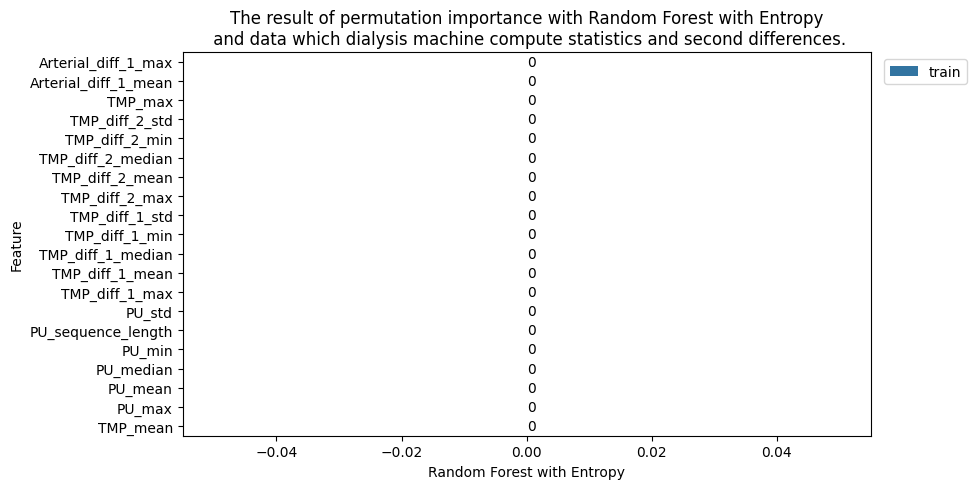

<Figure size 2000x1000 with 0 Axes>

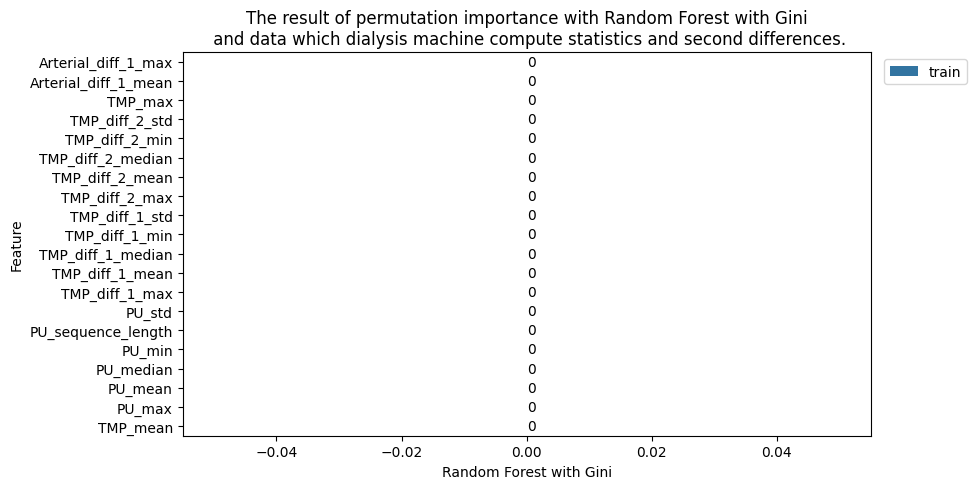

<Figure size 2000x1000 with 0 Axes>

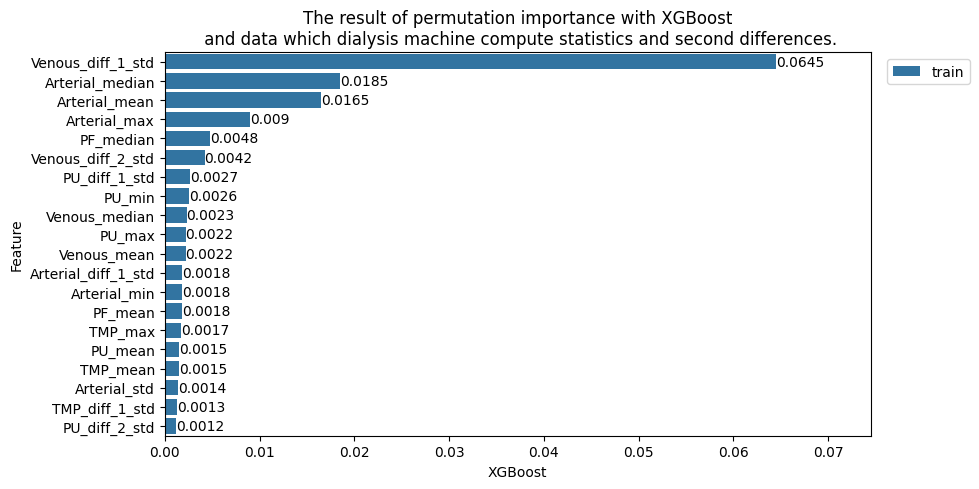

In [158]:
mean_totalResult = mean_totalResult.reset_index()
mean_totalResult = mean_totalResult.query("Standardization == 'None' and FeatureSelection == 'None' and Set == 'train'")

for one_model in mean_totalResult["Model"].unique():
    plt.figure(figsize = (20, 10))
    select_mean_totalResult = mean_totalResult.query("Model == @one_model").sort_values(by = "Importance_Mean", ascending = False).iloc[:20, :]
    select_mean_totalResult.loc[:, "Importance_Mean"] = select_mean_totalResult.loc[:, "Importance_Mean"].apply(lambda x: round(x, 4))
    plt.figure(figsize = (10, 5))
    ax = sns.barplot(data = select_mean_totalResult, y = "Feature", x = "Importance_Mean", hue = "Set")
    for i in ax.containers:
        ax.bar_label(i, )

    plt.xlabel(one_model)
    plt.legend(bbox_to_anchor = (1.15, 1))
    if select_mean_totalResult["Importance_Mean"].unique().tolist().__len__() > 1:
        plt.xlim(0, np.max(select_mean_totalResult["Importance_Mean"].unique())+0.01)
    plt.title(f"The result of permutation importance with {one_model}\n and data which dialysis machine compute statistics and second differences.")
    plt.tight_layout()
    plt.savefig(f"../result/Result_Plot/MetaData1_Permutation_Importance_{one_model}.png")
    plt.show()